# Peak list Attribution

#### Authors: Carlos M. Celis-Cornejo, Germain Salvato Vallverdu</br>

#### 2023/04/22

First, the tools needed to perform the attribution must be imported in the
notebook from `PyC2MC`.

In [3]:
from pyc2mc.processing.attribution import PeakListAttribution

## 1) Quick&Dirty attribution using defaults

It is mandatory to define at least the polarity.

In [4]:
run = PeakListAttribution(polarity="positive")

attributed_peaklist = run.run_attribution('data/ESI_pos_pH3_HULIS_darkAged.asc')

Look at summary about the run:

In [5]:
run.summary()

Formula grid
------------
Input Information of Formula Grid            
   Elements: ['C', 'H', 'O', 'N', 'S']            
   Elemental Limits: [[0, 100], [0, 200], [0, 6], [0, 6], [0, 1]]            
   Polarity: Polarity.positive            
   Mass bounds: (0, 1500)            
   H/C ratio bounds: (0.2, 3)            
   DBE bounds: None            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2}            
   Combine isotopes: []
Parameters
----------
    polarity: positive
    lambda_parameter: 1
    algorithm: AttributionAlgorithm.lowest_error
    low_signals_attribution: True
    use_isotopes: True
    use_SN: True
    isotopic_pattern: None
    building_block: C1 H2
----------
elapsed time: 40.46 s
 Attribution results:
 Total number of peaks: 4864
 Attributed peaks     : 3968
 Attributed percentage: 81.58 %
 hits percentage      : 88.66 %


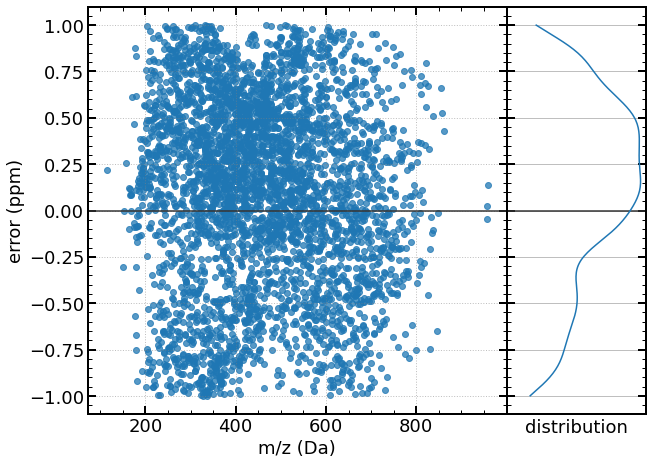

In [6]:
attributed_peaklist.plot.plot_error(distribution=True);

## 2) Define a simple formula grid

In this second example, the formula grid is defined from a chemical formula.
The chemical formula define the upper bounds of each element.

### 2.1) Lowest error

In [7]:
run = PeakListAttribution(
    polarity="positive",
    formula_grid="C100 H200 N2 O20 Na1",
)

attributed_peaklist = run.run_attribution('data/ESI_pos_pH3_HULIS_darkAged.asc')

In [8]:
run.summary()

Formula grid
------------
Input Information of Formula Grid            
   Elements: ['C', 'H', 'O', 'N', 'Na']            
   Elemental Limits: [[0, 100], [0, 200], [0, 20], [0, 2], [0, 1]]            
   Polarity: Polarity.positive            
   Mass bounds: (0, 1500)            
   H/C ratio bounds: (0.2, 3)            
   DBE bounds: None            
   ratio constrains: {}            
   Isotopes: {}            
   Combine isotopes: []
Parameters
----------
    polarity: positive
    lambda_parameter: 1
    algorithm: AttributionAlgorithm.lowest_error
    low_signals_attribution: True
    use_isotopes: False
    use_SN: True
    isotopic_pattern: None
    building_block: C1 H2
----------
elapsed time: 33.41 s
 Attribution results:
 Total number of peaks: 4864
 Attributed peaks     : 3950
 Attributed percentage: 81.21 %
 hits percentage      : 93.99 %


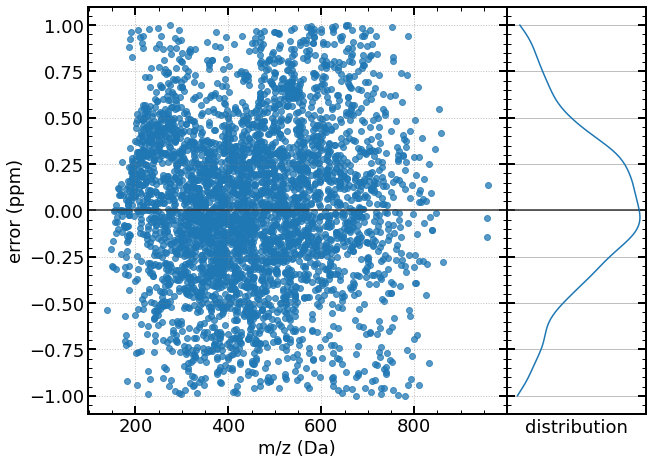

In [7]:
attributed_peaklist.plot.plot_error(distribution=True);

### 2.1) Isotopic pattern attribution

Include 13C isotopes in the formula grid and use the isotopic pattern
attribution algorithm.

In [9]:
run = PeakListAttribution(
    polarity="positive",
    formula_grid="C100 H200 N2 O20 Na1 13C1",
    algorithm="isotopic_pattern",
    isotopic_pattern=(6, 13),
)

# method parameter can be defined either in PeakListAttribution, to reapeat
# several time the same attribution, or in the run_attribution function
attributed_peaklist = run.run_attribution(
    'data/ESI_pos_pH3_HULIS_darkAged.asc',
    use_SN=False,
    lambda_parameter=1,
)

In [10]:
run.summary()

Formula grid
------------
Input Information of Formula Grid            
   Elements: ['C', 'H', 'O', 'N', 'Na']            
   Elemental Limits: [[0, 101], [0, 200], [0, 20], [0, 2], [0, 1]]            
   Polarity: Polarity.positive            
   Mass bounds: (0, 1500)            
   H/C ratio bounds: (0.2, 3)            
   DBE bounds: None            
   ratio constrains: {}            
   Isotopes: {(6, 13): 1}            
   Combine isotopes: []
Parameters
----------
    polarity: positive
    lambda_parameter: 1
    algorithm: AttributionAlgorithm.isotopic_pattern
    low_signals_attribution: True
    use_isotopes: True
    use_SN: False
    isotopic_pattern: (6, 13)
    building_block: C1 H2
----------
elapsed time: 43.73 s
 Attribution results:
 Total number of peaks: 4864
 Attributed peaks     : 4236
 Attributed percentage: 87.09 %
 hits percentage      : 95.73 %


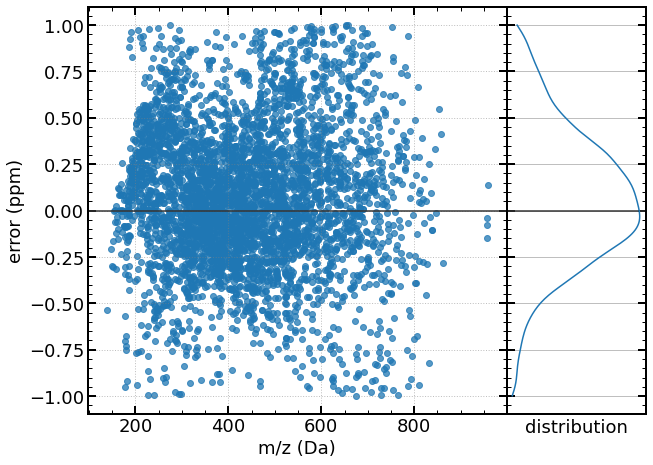

In [10]:
attributed_peaklist.plot.plot_error(distribution=True);

In [11]:
attributed_peaklist.get_attribution_stats()

attribution  percentage
attribution_method                         
no_hit                    628.0   12.911184
isotopes                  719.0   14.782072
isotopic_pattern          915.0   18.811678
lowest_error             2602.0   53.495066
totals                   4864.0  100.000000

<AxesSubplot:xlabel='# peaks'>

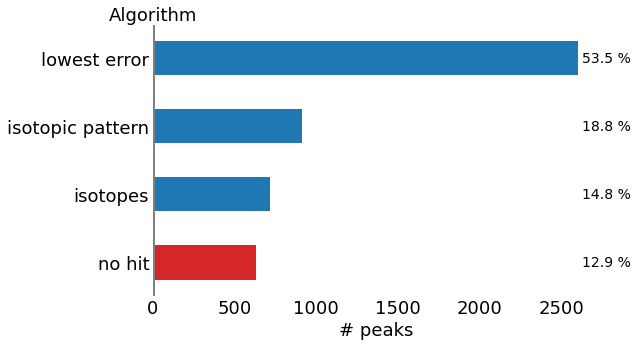

In [12]:
attributed_peaklist.plot.plot_attribution_stats()

## 3) Fine tuning of the formula grid

In this third example, the formula grid is defined from a chemical formula.
The chemical formula define the upper bounds of each element.

We will set up separatly the formula grid and the peak list.

In [13]:
from pyc2mc.core.formula_grid import FormulaGrid
from pyc2mc.io.peaklist import read_peaklist

In [14]:
pl = read_peaklist('data/ESI_pos_pH3_HULIS_darkAged.asc')

In [16]:
fg = FormulaGrid(
    polarity="positive",
    elements=["C", "H", "N", "O", "Na"],
    limits=[[0, 100], [0, 200], [0, 2], [0, 20], [0, 1]],
    mass_bounds=[50, 1000],
    isotopes={(6, 13): 2}
)

In [17]:
run = PeakListAttribution(polarity="positive")

attributed_peaklist = run.run_attribution(
    pl,
    formula_grid=fg,
    algorithm="isotopic_pattern",
    isotopic_pattern=(6, 13),
    use_SN=False,
    lambda_parameter=1,
)

In [18]:
run.summary()

Formula grid
------------
Input Information of Formula Grid            
   Elements: ['C', 'H', 'O', 'N', 'Na']            
   Elemental Limits: [[0, 100], [0, 200], [0, 20], [0, 2], [0, 1]]            
   Polarity: Polarity.positive            
   Mass bounds: [50, 1000]            
   H/C ratio bounds: (0.2, 3)            
   DBE bounds: None            
   ratio constrains: {}            
   Isotopes: {(6, 13): 2}            
   Combine isotopes: []
Parameters
----------
    polarity: positive
    lambda_parameter: 1
    algorithm: AttributionAlgorithm.isotopic_pattern
    low_signals_attribution: True
    use_isotopes: True
    use_SN: False
    isotopic_pattern: (6, 13)
    building_block: C1 H2
----------
elapsed time: 26.24 s
 Attribution results:
 Total number of peaks: 4864
 Attributed peaks     : 4276
 Attributed percentage: 87.91 %
 hits percentage      : 96.28 %


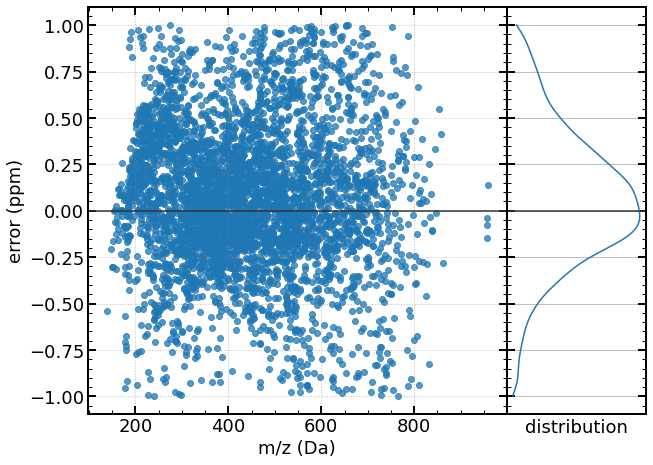

In [20]:
attributed_peaklist.plot.plot_error(distribution=True);

## 4) More results

An attributed peak list object has the following properties:

<AxesSubplot:xlabel='chem_class', ylabel='Relative Abundance (%)'>

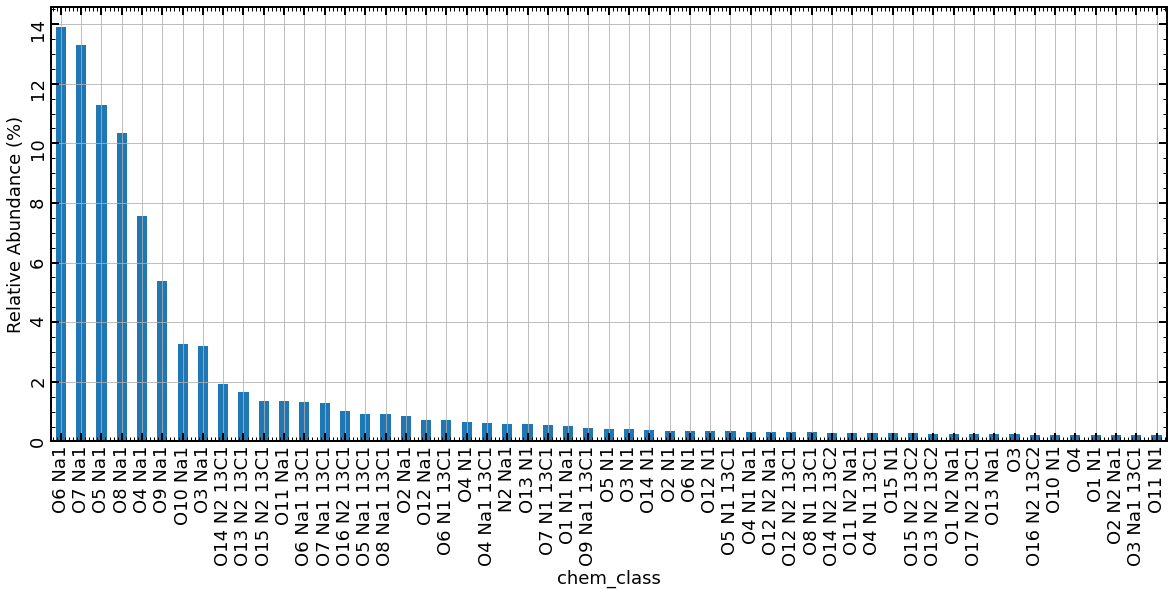

In [23]:
attributed_peaklist.plot.plot_classes(threshold=0.2, figsize=(20, 8))

<AxesSubplot:xlabel='C#', ylabel='DBE'>

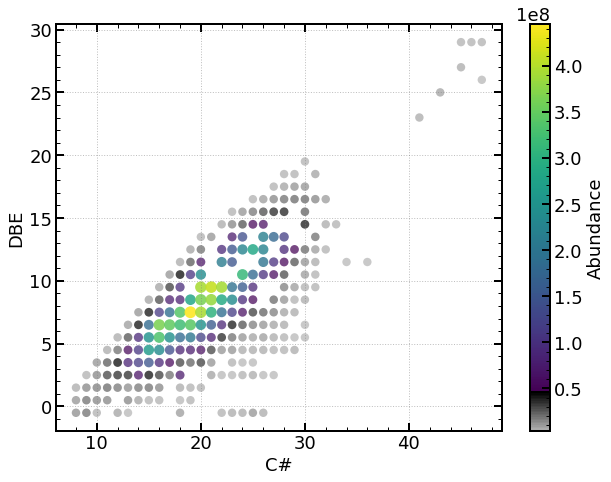

In [30]:
attributed_peaklist.plot.plot_dbe('O7 Na1')

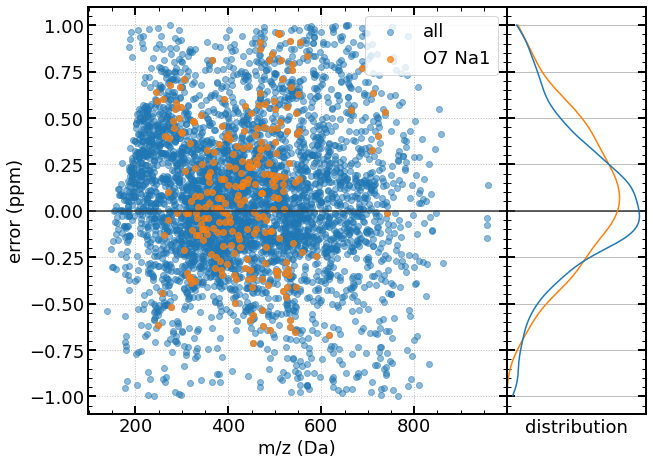

In [32]:
attributed_peaklist.plot.plot_error(chem_class=['O7 Na1', 'all'], distribution=True);

<AxesSubplot:xlabel='C#', ylabel='DBE'>

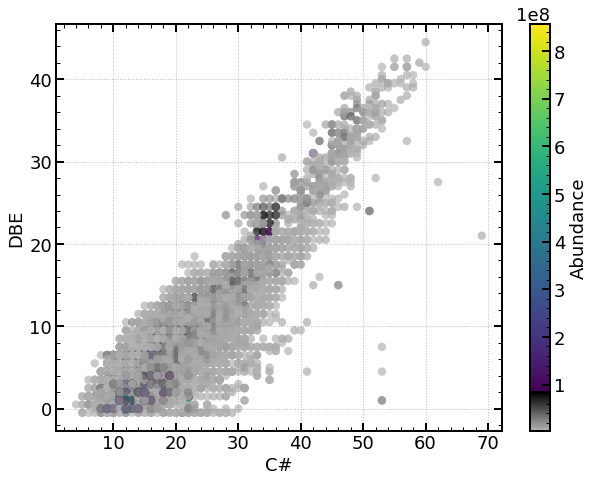

In [31]:
attributed_peaklist.plot.plot_dbe()

In [26]:
attributed_peaklist.to_dataframe(attributed_only=True)

mass  intensities                   formula  attributed  isotopic  \
3     139.03649    1907722.0              C5 H8 O3 Na1        True     False   
4     147.04162    1978768.0              C7 H8 O2 Na1        True     False   
5     149.02087    4694886.0              C6 H6 O3 Na1        True     False   
6     151.03654    2686167.0              C6 H8 O3 Na1        True     False   
7     151.07531    1992947.0                 C9 H11 O2        True     False   
...         ...          ...                       ...         ...       ...   
4859  861.48158    5541887.0           C41 H74 O17 Na1        True     False   
4860  955.76567   22006308.0       C53 H106 O11 N1 Na1        True     False   
4861  956.76909   12856103.0  C52 H106 O11 N1 Na1 13C1        True      True   
4862  957.54119    4637673.0             C62 H73 O7 N2        True     False   
4863  957.77225    5784610.0             C69 H99 O1 N1        True     False   

      error_ppm attribution_method       SN     C      H     O   Na    N  
3     -0.538123       lowest_error  0.00016   5.0    8.0   3.0  1.0  0.0  
4     -0.205378       lowest_error  0.00022   7.0    8.0   2.0  1.0  0.0  
5     -0.300322       lowest_error  0.00016   6.0    6.0   3.0  1.0  0.0  
6     -0.164323       lowest_error  0.00017   6.0    8.0   3.0  1.0  0.0  
7     -0.304576       lowest_error  0.00018   9.0   11.0   2.0  0.0  0.0  
...         ...                ...      ...   ...    ...   ...  ...  ...  
4859  -0.280471       lowest_error  0.00536  41.0   74.0  17.0  1.0  0.0  
4860  -0.145369   isotopic_pattern  0.00740  53.0  106.0  11.0  1.0  1.0  
4861  -0.077108           isotopes  0.00673  53.0  106.0  11.0  1.0  1.0  
4862  -0.040854       lowest_error  0.00642  62.0   73.0   7.0  0.0  2.0  
4863   0.137574       lowest_error  0.00704  69.0   99.0   1.0  0.0  1.0  

[4276 rows x 13 columns]

## 5. Save results

Save the results into a .csv output file using the attributed peak list object.

```python
# output filename
filename = 'my_results.csv'
attributed_peaklist.to_viewer(filename, full_data=True)
# attributed_peaklist.to_csv(filename, full_data=True)
```